In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
##natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
##for machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
#importing
over_dataframe= pd.read_csv('oversample.csv')

In [5]:
#Average length of each row 197.466
over_dataframe.comments_nostop.str.len().mean()

196.95904399485312

In [6]:
#Unique Word count 1073
_over_count = pd.Series(' '.join(over_dataframe['comments_nostop'] ).split()).value_counts()
_over_count.nunique() 

1079

In [7]:
over_dataframe.head

<bound method NDFrame.head of        Unnamed: 0  Unnamed: 0.1  listing_id           id        date  \
0               0             0     50646.0   11909864.0   18/4/2014   
1               1             1     50646.0   13823948.0    5/6/2014   
2               2             2     50646.0   15117222.0    2/7/2014   
3               3             3     50646.0   15426462.0    8/7/2014   
4               4             4     50646.0   15552912.0   11/7/2014   
...           ...           ...         ...          ...         ...   
73049       12195         14107   9563744.0  188889670.0   31/8/2017   
73050       26045         30149  24170288.0  292800518.0   19/7/2018   
73051        2661          2994   3859180.0  219598702.0  18/12/2017   
73052        3599          4049   4380000.0  573723009.0   7/12/2019   
73053       19647         22882  16522880.0  230798056.0   29/1/2018   

       reviewer_id reviewer_name  \
0        1356099.0         James   
1       15222393.0         Welli 

## oversample EDA 

In [8]:
#over_dataframe
negativeframe_over = over_dataframe[(over_dataframe['bin_word'] == "N")|(over_dataframe['bin_word']=="QN")|(over_dataframe['bin_word']=="VN")]
positiveframe_over = over_dataframe[(over_dataframe['bin_word'] == "P")|(over_dataframe['bin_word']=="QP")|(over_dataframe['bin_word']=="VP")]

# positve wordcount

In [9]:
positiveframe_over_count = pd.Series(' '.join(positiveframe_over['comments'] ).split()).value_counts()
positiveframe_over_count.head(20)

THE         72253
AND         67898
TO          45779
A           40232
IS          36734
WAS         26679
VERY        24214
IN          22724
FOR         20420
PLACE       20065
I           16809
STAY        15644
GREAT       15567
OF          15192
WITH        13340
IT          12819
WE          12547
YOU         12150
CLEAN       12024
LOCATION    10828
dtype: int64

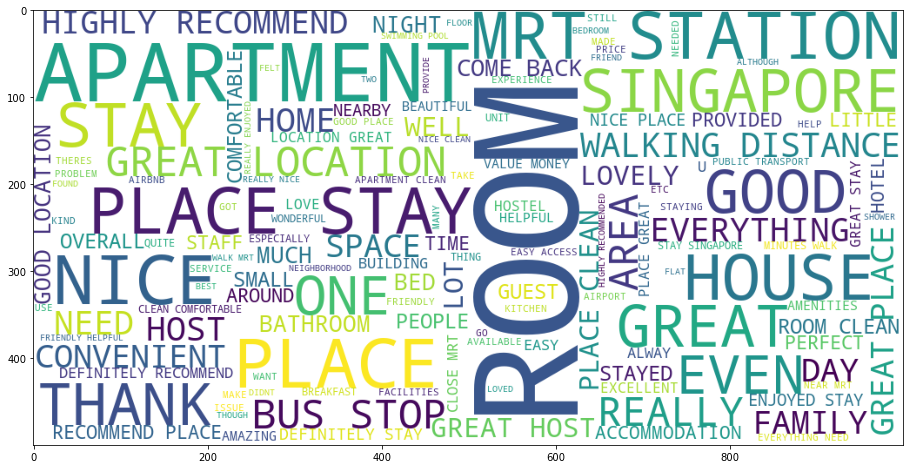

In [10]:
##word cloud
#word cloud
corpus = positiveframe_over['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud1 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud1)

In [11]:
##ngram exploration
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

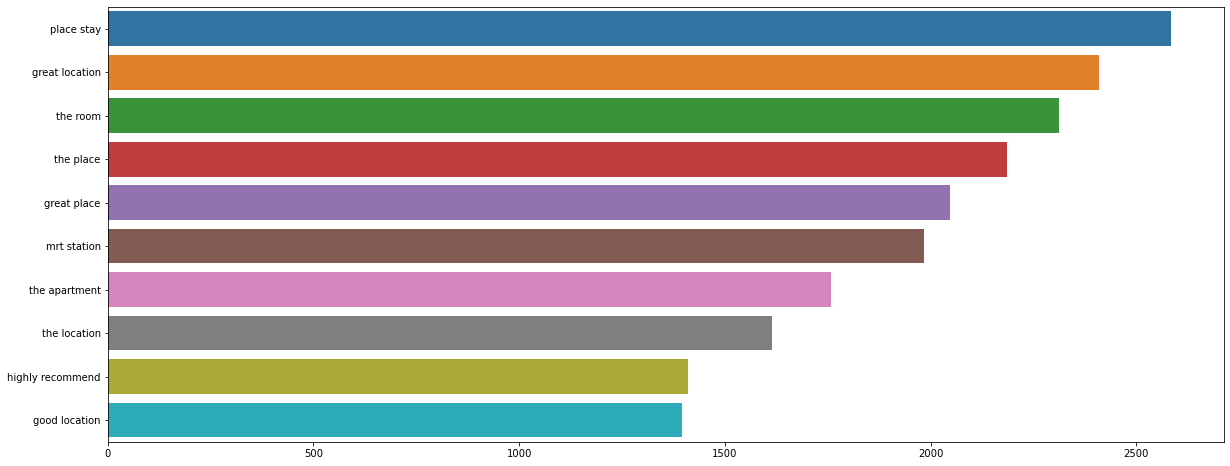

In [12]:
##twograms
P_twograms=get_top_ngram(positiveframe_over['comments_nostop'],n=2)
x,y=map(list,zip(*P_twograms))
sns.barplot(x=y,y=x)

<AxesSubplot:>

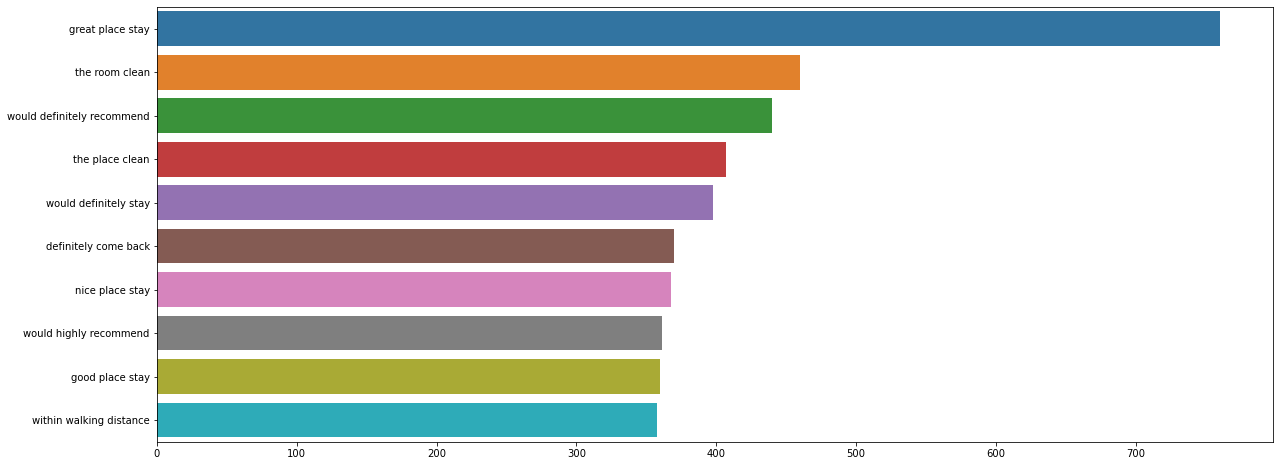

In [13]:
##threegrams
P_thgrams=get_top_ngram(positiveframe_over['comments_nostop'],n=3)
x,y=map(list,zip(*P_thgrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

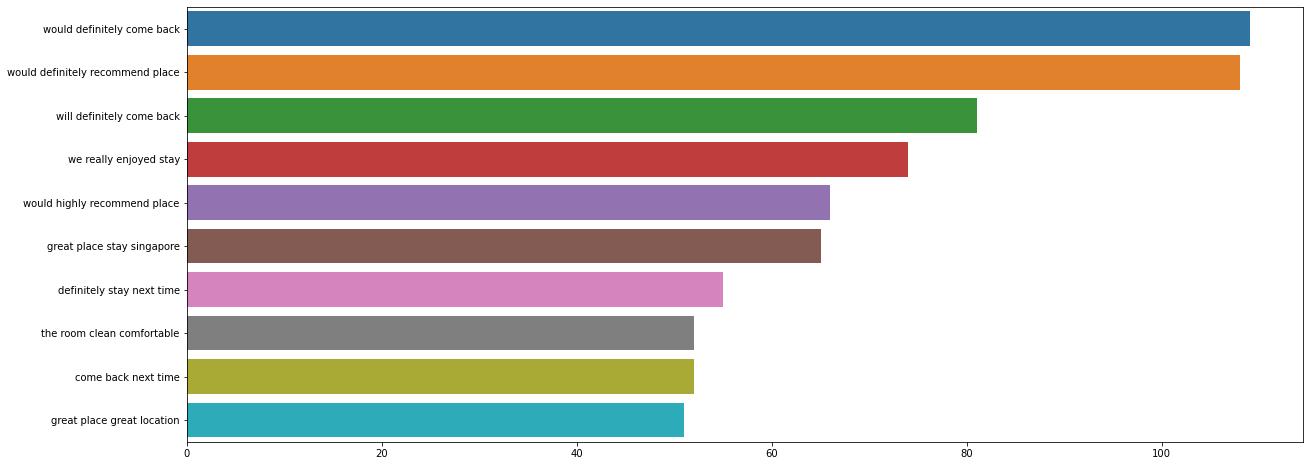

In [14]:
##fourgrams
P_fourgrams=get_top_ngram(positiveframe_over['comments_nostop'],n=4)
x,y=map(list,zip(*P_fourgrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

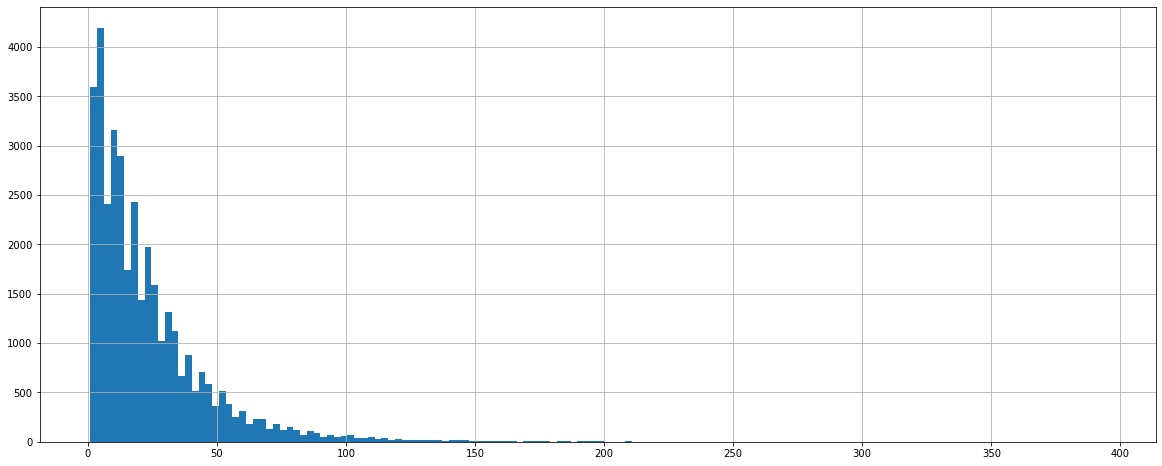

In [15]:
##numbers of words
positiveframe_over['comments_nostop'].str.split().\
    map(lambda x: len(x)).\
    hist(bins=150)

<AxesSubplot:>

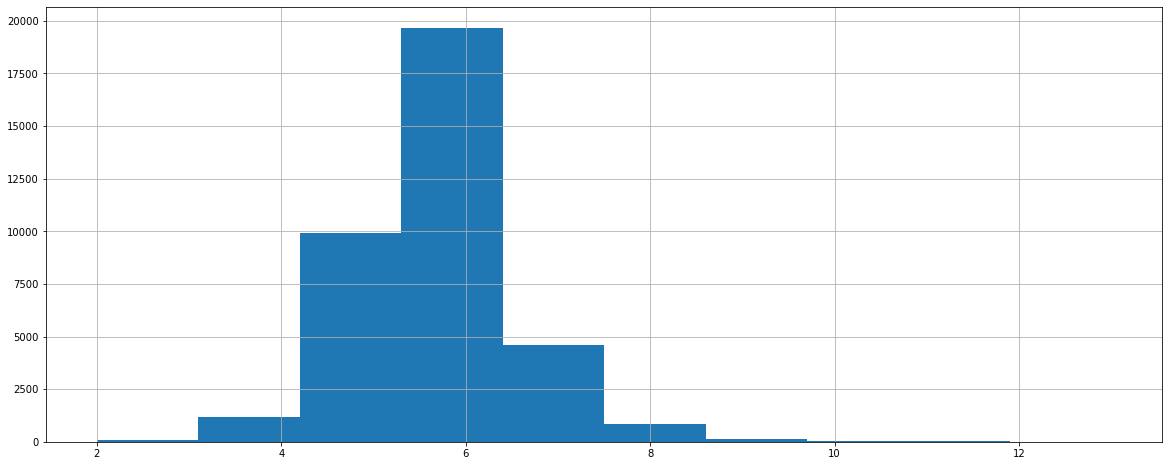

In [16]:
##average word
import numpy as np
positiveframe_over['comments_nostop'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

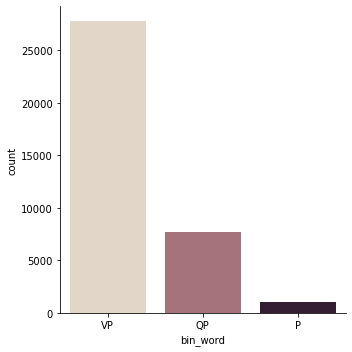

In [17]:
sns.catplot(x="bin_word", kind="count", palette="ch:.25", data=positiveframe_over)

# negative wordcount

In [18]:
negativeframe_over_count = pd.Series(' '.join(negativeframe_over['comments'] ).split()).value_counts()
negativeframe_over_count.head(20)

THE     148732
AND      71246
TO       68865
A        48363
IS       47757
WAS      40950
I        39051
IN       37257
OF       30488
NOT      29845
FOR      28695
IT       23196
WE       22950
ROOM     22767
BUT      21355
THAT     18671
VERY     17967
NO       16827
ON       16284
WITH     16242
dtype: int64

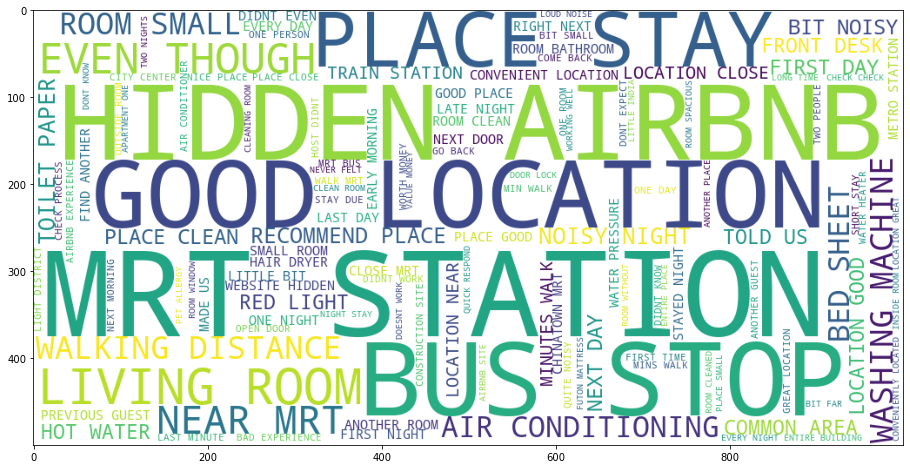

In [19]:
##word cloud 2
#word cloud 2
corpus = negativeframe_over['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud2 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud2)

<AxesSubplot:>

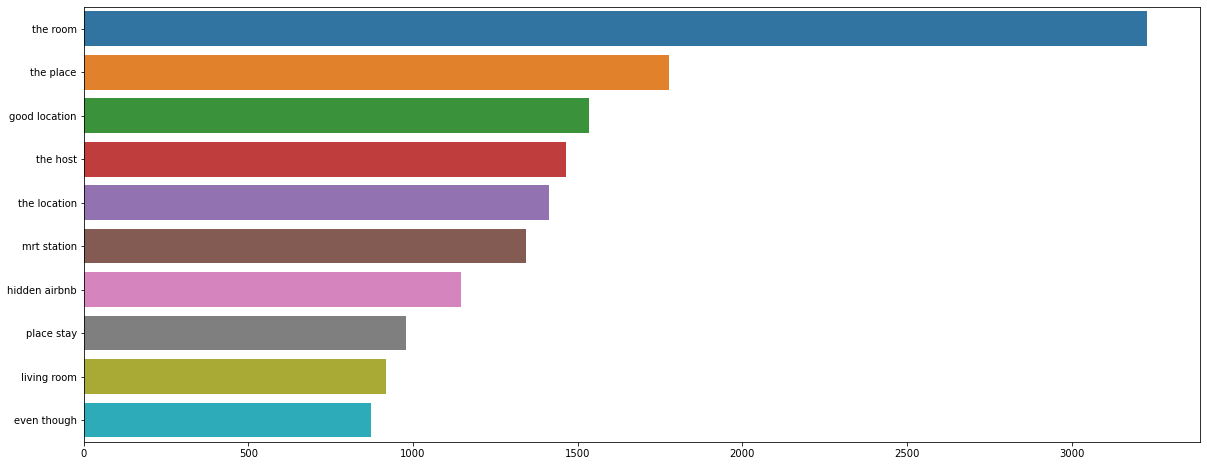

In [20]:
##twograms
N_two_grams=get_top_ngram(negativeframe_over['comments_nostop'],n=2)
x,y=map(list,zip(*N_two_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

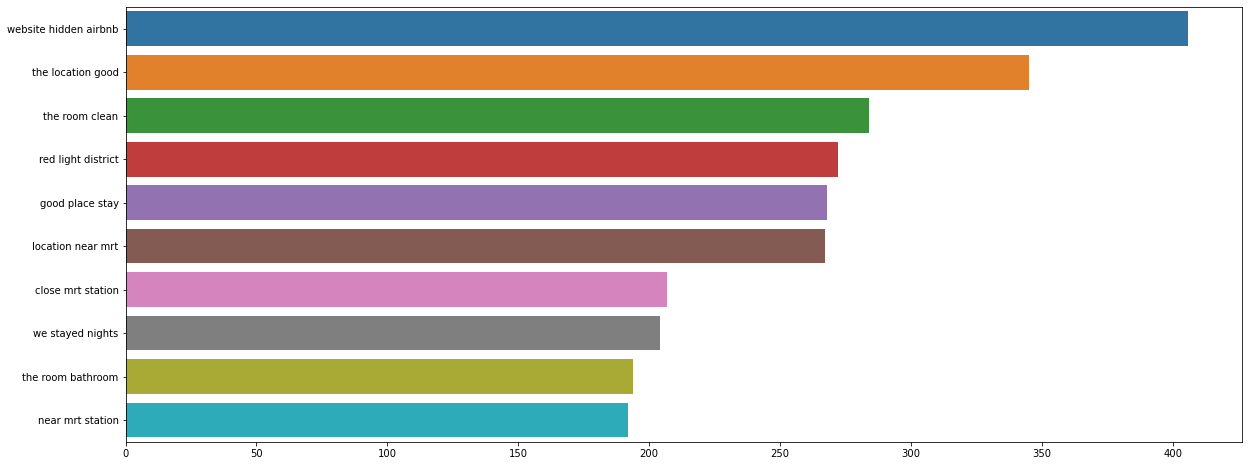

In [21]:
##threegrams
N_three_grams=get_top_ngram(negativeframe_over['comments_nostop'],n=3)
x,y=map(list,zip(*N_three_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

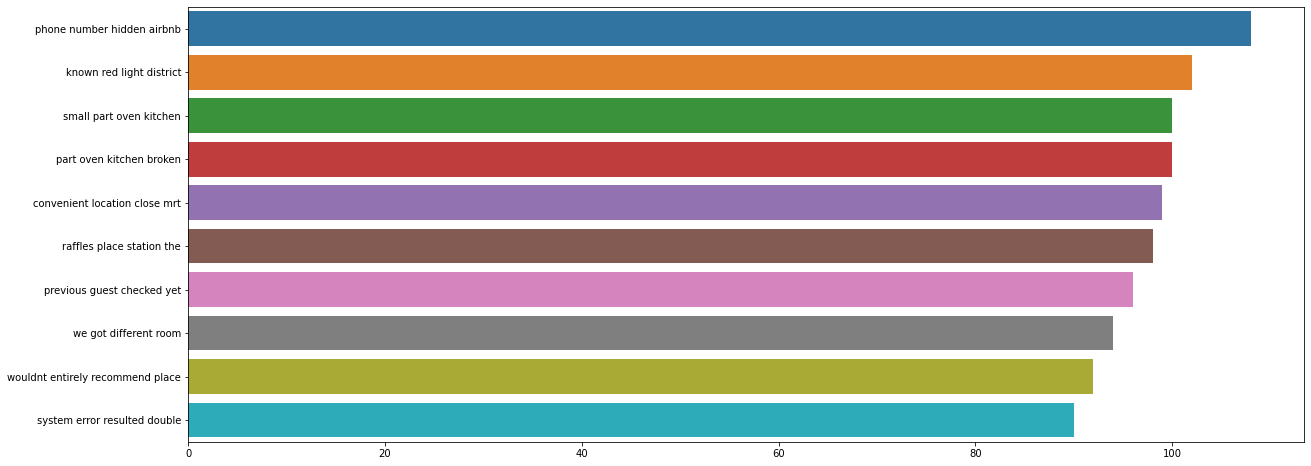

In [22]:
##fourgrams
N_four_grams=get_top_ngram(negativeframe_over['comments_nostop'],n=4)
x,y=map(list,zip(*N_four_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

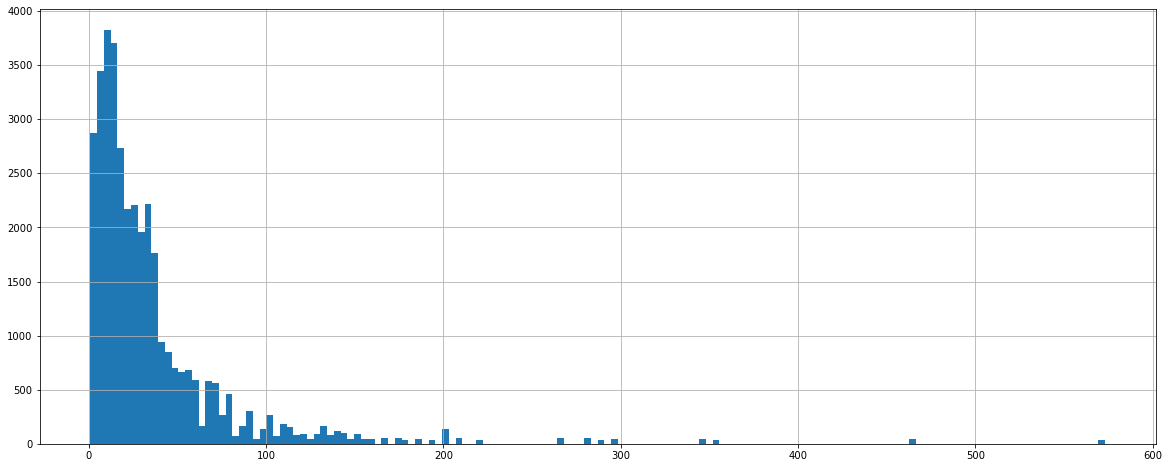

In [23]:
##numbers of words
negativeframe_over['comments_nostop'].str.split().\
    map(lambda x: len(x)).\
    hist(bins=150)

<AxesSubplot:>

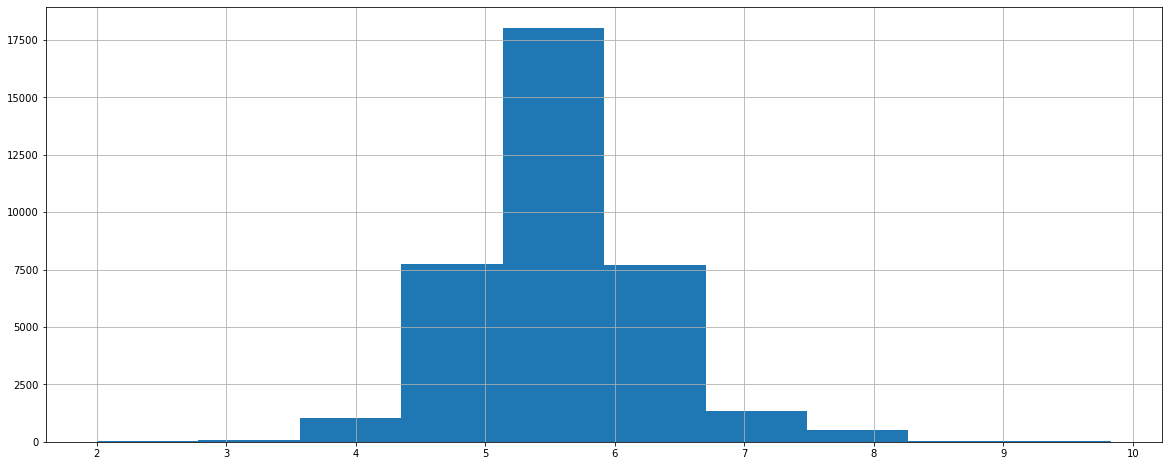

In [24]:
##average word
import numpy as np
negativeframe_over['comments_nostop'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

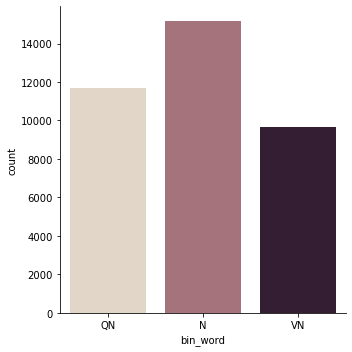

In [25]:
sns.catplot(x="bin_word", kind="count", palette="ch:.25", data=negativeframe_over)